# **Pirate Pain Challenge - Data Visualization**

## 🌐 **Google Drive Connection or local mount**

In [1]:
import os

isColab = False
isKaggle = False

# Directory di default
current_dir = os.getcwd()

try:
    if not isColab:
        raise ImportError("We are not in google colab")
    from google.colab import drive

    drive.mount("/gdrive")
    current_dir = "/gdrive/My\\ Drive/Colab\\ Notebooks/[2025-2026]\\ AN2DL/AN2DL-challenge-1"
    print("In esecuzione su Colab. Google Drive montato.")
    %cd $current_dir
    isColab = True

except ImportError:
    # Rilevamento ambiente Kaggle
    if os.environ.get("KAGGLE_KERNEL_RUN_TYPE") or os.path.exists("/kaggle/working") or isKaggle:
        isKaggle = True
        kaggle_work_dir = "/kaggle/working/AN2DL-challenge-1"
        os.makedirs(kaggle_work_dir, exist_ok=True)
        current_dir = kaggle_work_dir
        print("In esecuzione su Kaggle. Directory di lavoro impostata.")
    else:
        isColab = False
        isKaggle = False
        print("Esecuzione locale. Salto mount Google Drive.")
        local_pref = r"G:\Il mio Drive\Colab Notebooks\[2025-2026] AN2DL\AN2DL-challenge-1"

        current_dir = local_pref if os.path.isdir(local_pref) else os.getcwd()
        print(f"Directory corrente impostata a: {current_dir}")

# Cambio directory se non Colab (su Colab è già fatto con %cd)
if not isColab:
    os.chdir(current_dir)

print(f"Changed directory to: {current_dir}")

Esecuzione locale. Salto mount Google Drive.
Directory corrente impostata a: G:\Il mio Drive\Colab Notebooks\[2025-2026] AN2DL\AN2DL-challenge-1
Changed directory to: G:\Il mio Drive\Colab Notebooks\[2025-2026] AN2DL\AN2DL-challenge-1


## ⚙️ **Libraries Import**

In [2]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch

torch.manual_seed(SEED)
# from torchsummary import summary

logs_dir = "tensorboard"
if isColab:
    !pkill -f tensorboard
else:
    # Arresta eventuali processi tensorboard in locale (Windows)
    import os

    if os.name == 'nt':
        try:
            import psutil

            for proc in psutil.process_iter(['name', 'cmdline']):
                name = (proc.info.get('name') or '').lower()
                cmd = ' '.join(proc.info.get('cmdline') or []).lower()
                if 'tensorboard' in name or 'tensorboard' in cmd:
                    try:
                        proc.kill()
                    except Exception:
                        pass
        except ImportError:
            import subprocess

            subprocess.run(['taskkill', '/F', '/IM', 'tensorboard.exe'],
                           stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

%load_ext tensorboard
if isColab:
    !mkdir -p models
else:
    os.makedirs("../models", exist_ok=True)

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

PyTorch version: 2.8.0+cpu
Device: cpu


## ⏳ **Data Downloading**

In [3]:
import os
import zipfile

# --- 1. Impostazioni ---
competition_name = 'an2dl2526c1'
dataset_path = 'dataset'
if isKaggle:
    dataset_path = '/kaggle/input/pirate-pain/dataset'
train_file = 'pirate_pain_train.csv'
test_file = 'pirate_pain_test.csv'
labels_file = 'pirate_pain_train_labels.csv'
sample_submission_file = 'sample_submission.csv'

# Controlla se il dataset è già stato scaricato ed estratto
if not os.path.exists(os.path.join(dataset_path, train_file)):
    # --- 2. Autenticazione e Download ---
    from kaggle.api.kaggle_api_extended import KaggleApi

    # Inizializza l'API di Kaggle
    # L'autenticazione avviene automaticamente se 'kaggle.json' è in C:\\Users\\Bert0ns\\.kaggle\\
    api = KaggleApi()
    api.authenticate()

    print(f"Download del dataset dalla competizione '{competition_name}'...")

    # Crea la directory di destinazione se non esiste
    os.makedirs(dataset_path, exist_ok=True)

    # Scarica i file della competizione nella cartella 'dataset'
    api.competition_download_files(competition_name, path=dataset_path)

    # Estrai i file dall'archivio zip
    zip_path = os.path.join(dataset_path, f'{competition_name}.zip')
    if os.path.exists(zip_path):
        print(f"Estrazione dei file da '{zip_path}'...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        # Rimuovi il file zip dopo l'estrazione
        os.remove(zip_path)
        print("Estrazione completata e file zip rimosso.")
    else:
        print("ATTENZIONE: File zip non trovato. Il download potrebbe non essere riuscito.")
else:
    print("Il dataset è già presente nella cartella 'dataset'. Download saltato.")



Il dataset è già presente nella cartella 'dataset'. Download saltato.


## 🔎 **Exploration and Data Analysis**

In [4]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv(os.path.join(dataset_path, train_file))
kaggle_test_df = pd.read_csv(os.path.join(dataset_path, test_file))
labels_df = pd.read_csv(os.path.join(dataset_path, labels_file))
sample_submission_df = pd.read_csv(os.path.join(dataset_path, sample_submission_file))

In [5]:
print(f"DataFrame shape: {train_df.shape}")
train_df.head(300)

DataFrame shape: (105760, 40)


sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0               0     0              2              0              2   
1               0     1              2              2              2   
2               0     2              2              0              2   
3               0     3              2              2              2   
4               0     4              2              2              2   
..            ...   ...            ...            ...            ...   
295             1   135              2              2              2   
296             1   136              2              2              2   
297             1   137              2              1              2   
298             1   138              2              2              1   
299             1   139              2              2              0   

     pain_survey_4 n_legs n_hands n_eyes  joint_00  ...      joint_21  \
0                1    two     two    two  1.094705  ...  3.499558e-06   
1                2    two     two    two  1.135183  ...  3.976952e-07   
2                2    two     two    two  1.080745  ...  1.533820e-07   
3                2    two     two    two  0.938017  ...  1.006865e-05   
4                2    two     two    two  1.090185  ...  4.437266e-06   
..             ...    ...     ...    ...       ...  ...           ...   
295              2    two     two    two  1.224606  ...  0.000000e+00   
296              2    two     two    two  1.224941  ...  9.480348e-07   
297              2    two     two    two  1.252871  ...  3.317316e-07   
298              2    two     two    two  1.251569  ...  3.093716e-07   
299              2    two     two    two  1.267141  ...  1.013480e-06   

         joint_22      joint_23      joint_24      joint_25  joint_26  \
0    1.945042e-06  3.999558e-06  1.153299e-05  3.805930e-06  0.017592   
1    6.765107e-07  6.019627e-06  4.643774e-08  0.000000e+00  0.013352   
2    1.698525e-07  1.446051e-06  2.424536e-06  2.513519e-06  0.016225   
3    5.511079e-07  1.847597e-06  5.432416e-08  0.000000e+00  0.011832   
4    1.735459e-07  1.552722e-06  5.825366e-08  7.044832e-06  0.005360   
..            ...           ...           ...           ...       ...   
295  1.457226e-06  1.978559e-06  1.933064e-06  6.102752e-06  0.037370   
296  3.483824e-07  2.366589e-06  2.745167e-07  1.134226e-05  0.030967   
297  2.317636e-06  1.235017e-07  4.266181e-07  1.601467e-06  0.015595   
298  3.494299e-07  1.192149e-07  2.709641e-07  9.290970e-07  0.044671   
299  5.552671e-07  3.806584e-06  2.691176e-07  6.184323e-06  0.018934   

     joint_27  joint_28  joint_29  joint_30  
0    0.013508  0.026798  0.027815       0.5  
1    0.000000  0.013377  0.013716       0.5  
2    0.008110  0.024097  0.023105       0.5  
3    0.007450  0.028613  0.024648       0.5  
4    0.002532  0.033026  0.025328       0.5  
..        ...       ...       ...       ...  
295  0.071729  0.085482  0.043072       0.5  
296  0.086378  0.090824  0.054885       0.5  
297  0.068413  0.132164  0.073057       0.5  
298  0.119201  0.130871  0.061973       0.5  
299  0.075922  0.170899  0.079293       0.5  

[300 rows x 40 columns]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int64  
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int64  
 3   pain_survey_2  105760 non-null  int64  
 4   pain_survey_3  105760 non-null  int64  
 5   pain_survey_4  105760 non-null  int64  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float64
 10  joint_01       105760 non-null  float64
 11  joint_02       105760 non-null  float64
 12  joint_03       105760 non-null  float64
 13  joint_04       105760 non-null  float64
 14  joint_05       105760 non-null  float64
 15  joint_06       105760 non-null  float64
 16  joint_07       105760 non-null  float64
 17  joint_08       105760 non-nul

In [7]:
print(f"DataFrame shape: {kaggle_test_df.shape}")
kaggle_test_df.head()

DataFrame shape: (211840, 40)


sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              2              2   
1             0     1              2              2              2   
2             0     2              2              2              2   
3             0     3              1              2              2   
4             0     4              2              2              2   

   pain_survey_4 n_legs n_hands n_eyes  joint_00  ...  joint_21  joint_22  \
0              2    two     two    two  0.842535  ...  0.000003  0.000004   
1              2    two     two    two  0.898836  ...  0.000003  0.000004   
2              2    two     two    two  0.957765  ...  0.000006  0.000004   
3              2    two     two    two  0.832596  ...  0.000005  0.000004   
4              0    two     two    two  0.805971  ...  0.000006  0.000004   

   joint_23  joint_24  joint_25  joint_26  joint_27  joint_28  joint_29  \
0  0.000003  0.000003  0.000068  0.019372  0.066324  0.022228  0.013576   
1  0.000004  0.000003  0.000029  0.069747  0.080417  0.023650  0.038793   
2  0.000009  0.000004  0.000008  0.054968  0.058811  0.027023  0.054202   
3  0.000003  0.000004  0.000015  0.048695  0.047128  0.016151  0.024983   
4  0.000003  0.000003  0.000008  0.019762  0.031116  0.015618  0.017931   

   joint_30  
0       0.5  
1       0.5  
2       0.5  
3       0.5  
4       0.5  

[5 rows x 40 columns]

In [8]:
kaggle_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211840 entries, 0 to 211839
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   211840 non-null  int64  
 1   time           211840 non-null  int64  
 2   pain_survey_1  211840 non-null  int64  
 3   pain_survey_2  211840 non-null  int64  
 4   pain_survey_3  211840 non-null  int64  
 5   pain_survey_4  211840 non-null  int64  
 6   n_legs         211840 non-null  object 
 7   n_hands        211840 non-null  object 
 8   n_eyes         211840 non-null  object 
 9   joint_00       211840 non-null  float64
 10  joint_01       211840 non-null  float64
 11  joint_02       211840 non-null  float64
 12  joint_03       211840 non-null  float64
 13  joint_04       211840 non-null  float64
 14  joint_05       211840 non-null  float64
 15  joint_06       211840 non-null  float64
 16  joint_07       211840 non-null  float64
 17  joint_08       211840 non-nul

In [9]:
print(f"DataFrame shape: {labels_df.shape}")
labels_df.head()

DataFrame shape: (661, 2)


sample_index     label
0             0   no_pain
1             1   no_pain
2             2  low_pain
3             3   no_pain
4             4   no_pain

In [10]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sample_index  661 non-null    int64 
 1   label         661 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [11]:
print(f"DataFrame shape: {sample_submission_df.shape}")
sample_submission_df.head()

DataFrame shape: (1324, 2)


sample_index      label
0             0  high_pain
1             1    no_pain
2             2    no_pain
3             3   low_pain
4             4  high_pain

In [12]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sample_index  1324 non-null   int64 
 1   label         1324 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.8+ KB


**Convert data to a memory efficient form**

In [13]:
na_value = -1
text_map = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
    'unknown': na_value, 'nan': na_value, 'none': na_value, 'n/a': na_value,
    'one+peg_leg': 1, 'one+hook_hand': 1, 'one+eye_patch': 1,
    'no_pain': 0, 'low_pain': 1, 'high_pain': 2
}

# Pulisce, normalizza, mappa; fallback a numerico e a cifre estratte
columns_to_convert = ['n_legs', 'n_hands', 'n_eyes']
for col in columns_to_convert:
    train_df[col] = train_df[col].str.strip().str.lower().map(text_map).astype('int8')
    kaggle_test_df[col] = kaggle_test_df[col].str.strip().str.lower().map(text_map).astype('int8')

# train_df.head(105760)

In [14]:
# Convert data types from float64 to float32 to save memory
train_df[train_df.select_dtypes(include=['float64']).columns] = train_df.select_dtypes(
    include=['float64']).astype(
    'float32')
kaggle_test_df[kaggle_test_df.select_dtypes(include=['float64']).columns] = kaggle_test_df.select_dtypes(
    include=['float64']).astype(
    'float32')

# Convert int64 to int32
train_df[train_df.select_dtypes(include=['int64']).columns] = train_df.select_dtypes(include=['int64']).astype(
    'int32')
kaggle_test_df[kaggle_test_df.select_dtypes(include=['int64']).columns] = kaggle_test_df.select_dtypes(
    include=['int64']).astype('int32')
labels_df[labels_df.select_dtypes(include=['int64']).columns] = labels_df.select_dtypes(include=['int64']).astype(
    'int32')

# Convert pain surveys to int8
train_df['pain_survey_1'] = train_df['pain_survey_1'].astype('int8')
train_df['pain_survey_2'] = train_df['pain_survey_2'].astype('int8')
train_df['pain_survey_3'] = train_df['pain_survey_3'].astype('int8')
train_df['pain_survey_4'] = train_df['pain_survey_4'].astype('int8')

kaggle_test_df['pain_survey_1'] = kaggle_test_df['pain_survey_1'].astype('int8')
kaggle_test_df['pain_survey_2'] = kaggle_test_df['pain_survey_2'].astype('int8')
kaggle_test_df['pain_survey_3'] = kaggle_test_df['pain_survey_3'].astype('int8')
kaggle_test_df['pain_survey_4'] = kaggle_test_df['pain_survey_4'].astype('int8')

# Convert labels sample_index to int8
labels_df['label'] = labels_df['label'].str.strip().str.lower().map(text_map).astype('int8')

In [15]:
print("train:\n")
train_df.info()
print("\nkaggle test:\n")
kaggle_test_df.info()
print("\nlabels:\n")
labels_df.info()

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int32  
 1   time           105760 non-null  int32  
 2   pain_survey_1  105760 non-null  int8   
 3   pain_survey_2  105760 non-null  int8   
 4   pain_survey_3  105760 non-null  int8   
 5   pain_survey_4  105760 non-null  int8   
 6   n_legs         105760 non-null  int8   
 7   n_hands        105760 non-null  int8   
 8   n_eyes         105760 non-null  int8   
 9   joint_00       105760 non-null  float32
 10  joint_01       105760 non-null  float32
 11  joint_02       105760 non-null  float32
 12  joint_03       105760 non-null  float32
 13  joint_04       105760 non-null  float32
 14  joint_05       105760 non-null  float32
 15  joint_06       105760 non-null  float32
 16  joint_07       105760 non-null  float32
 17  joint_08       105760

In [16]:
# Visualize count of timestamps per categorical feature
def plot_timestamps_per_feature(df, columns, n_cols=4, figsize_per_plot=(4, 3)):
    n = len(columns)
    n_rows = (n + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows),
                             constrained_layout=True)
    axes = axes.flatten()

    for ax, col in zip(axes, columns):
        series = df[col].dropna()
        # numerical order if possible, else frequency order
        try:
            order = sorted(series.unique())
        except Exception:
            order = series.value_counts().index

        sns.countplot(
            x=col,
            data=df,
            order=order,
            palette='viridis',
            ax=ax
        )
        ax.set_title(f"Number of timestamps: {col.title()}", fontsize=11)
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=9)
        ax.set_ylabel("Counts", fontsize=9)
        ax.grid(axis='y', alpha=0.25, linestyle='--', linewidth=0.7)

        total = len(df[col])
        ymax = 0
        for p in ax.patches:
            count = int(p.get_height())
            if count > ymax:
                ymax = count
            if count > 0:
                ax.text(
                    p.get_x() + p.get_width() / 2,
                    p.get_height() + total * 0.005,
                    f"{count}\n{count / total:.1%}",
                    ha='center',
                    va='bottom',
                    fontsize=8
                )
        ax.set_ylim(0, ymax * 1.20)

        if len(order) > 8:
            ax.tick_params(axis='x', rotation=35)

    for ax in axes[n:]:
        ax.axis('off')

    plt.show()
    plt.close(fig)

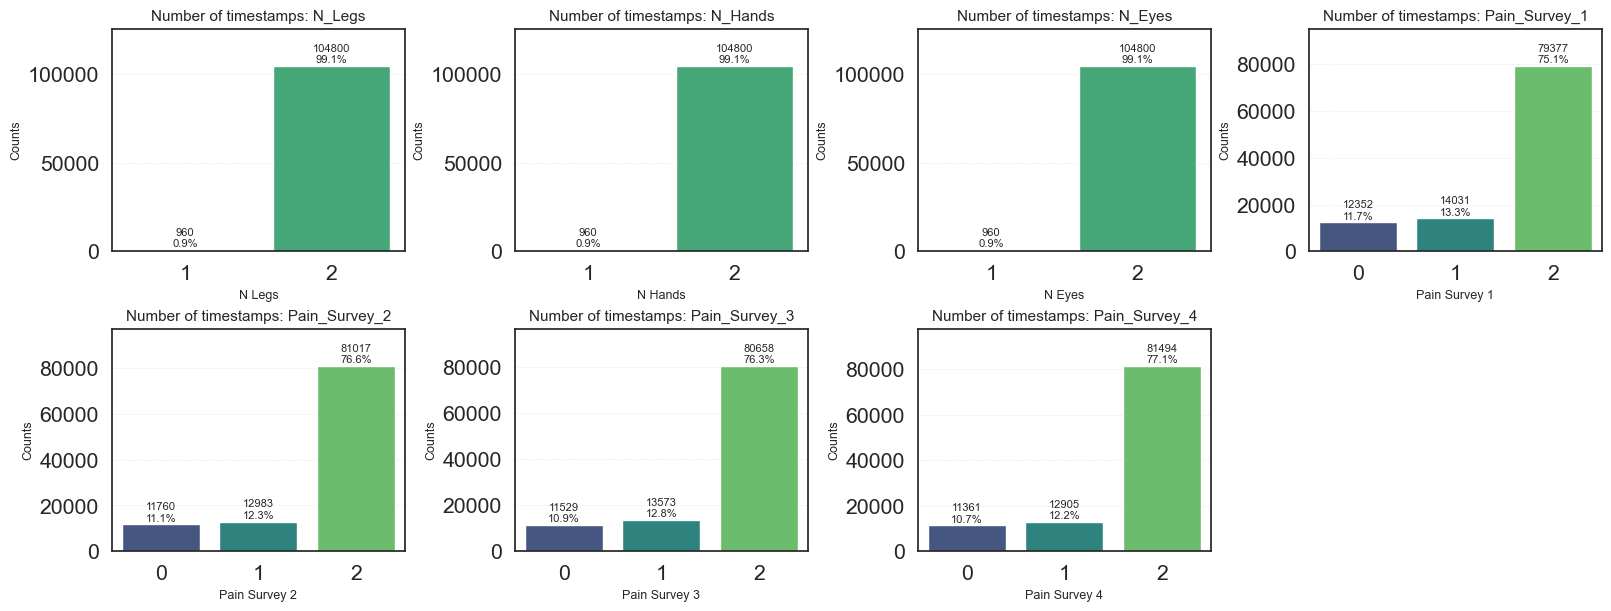

In [17]:
categorical_columns = ['n_legs', 'n_hands', 'n_eyes', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3',
                       'pain_survey_4']
plot_timestamps_per_feature(train_df, categorical_columns, n_cols=4)

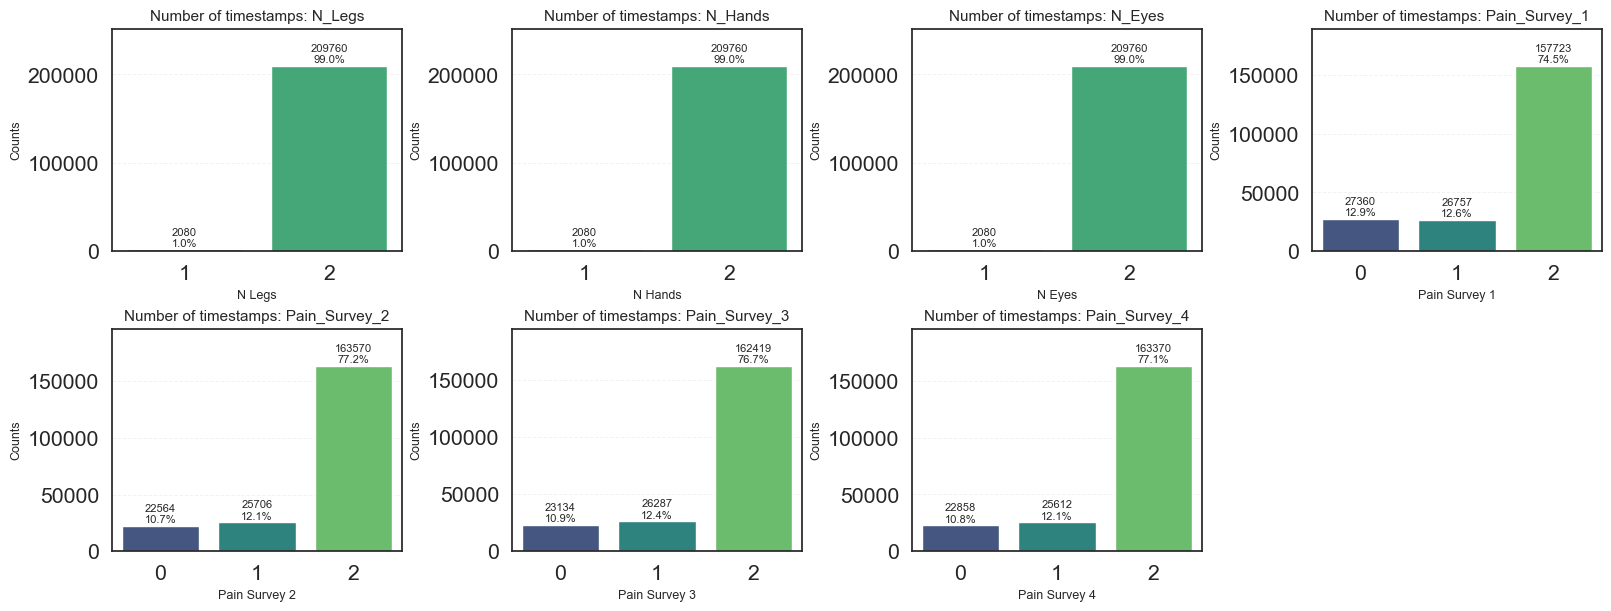

In [18]:
plot_timestamps_per_feature(kaggle_test_df, categorical_columns, n_cols=4)

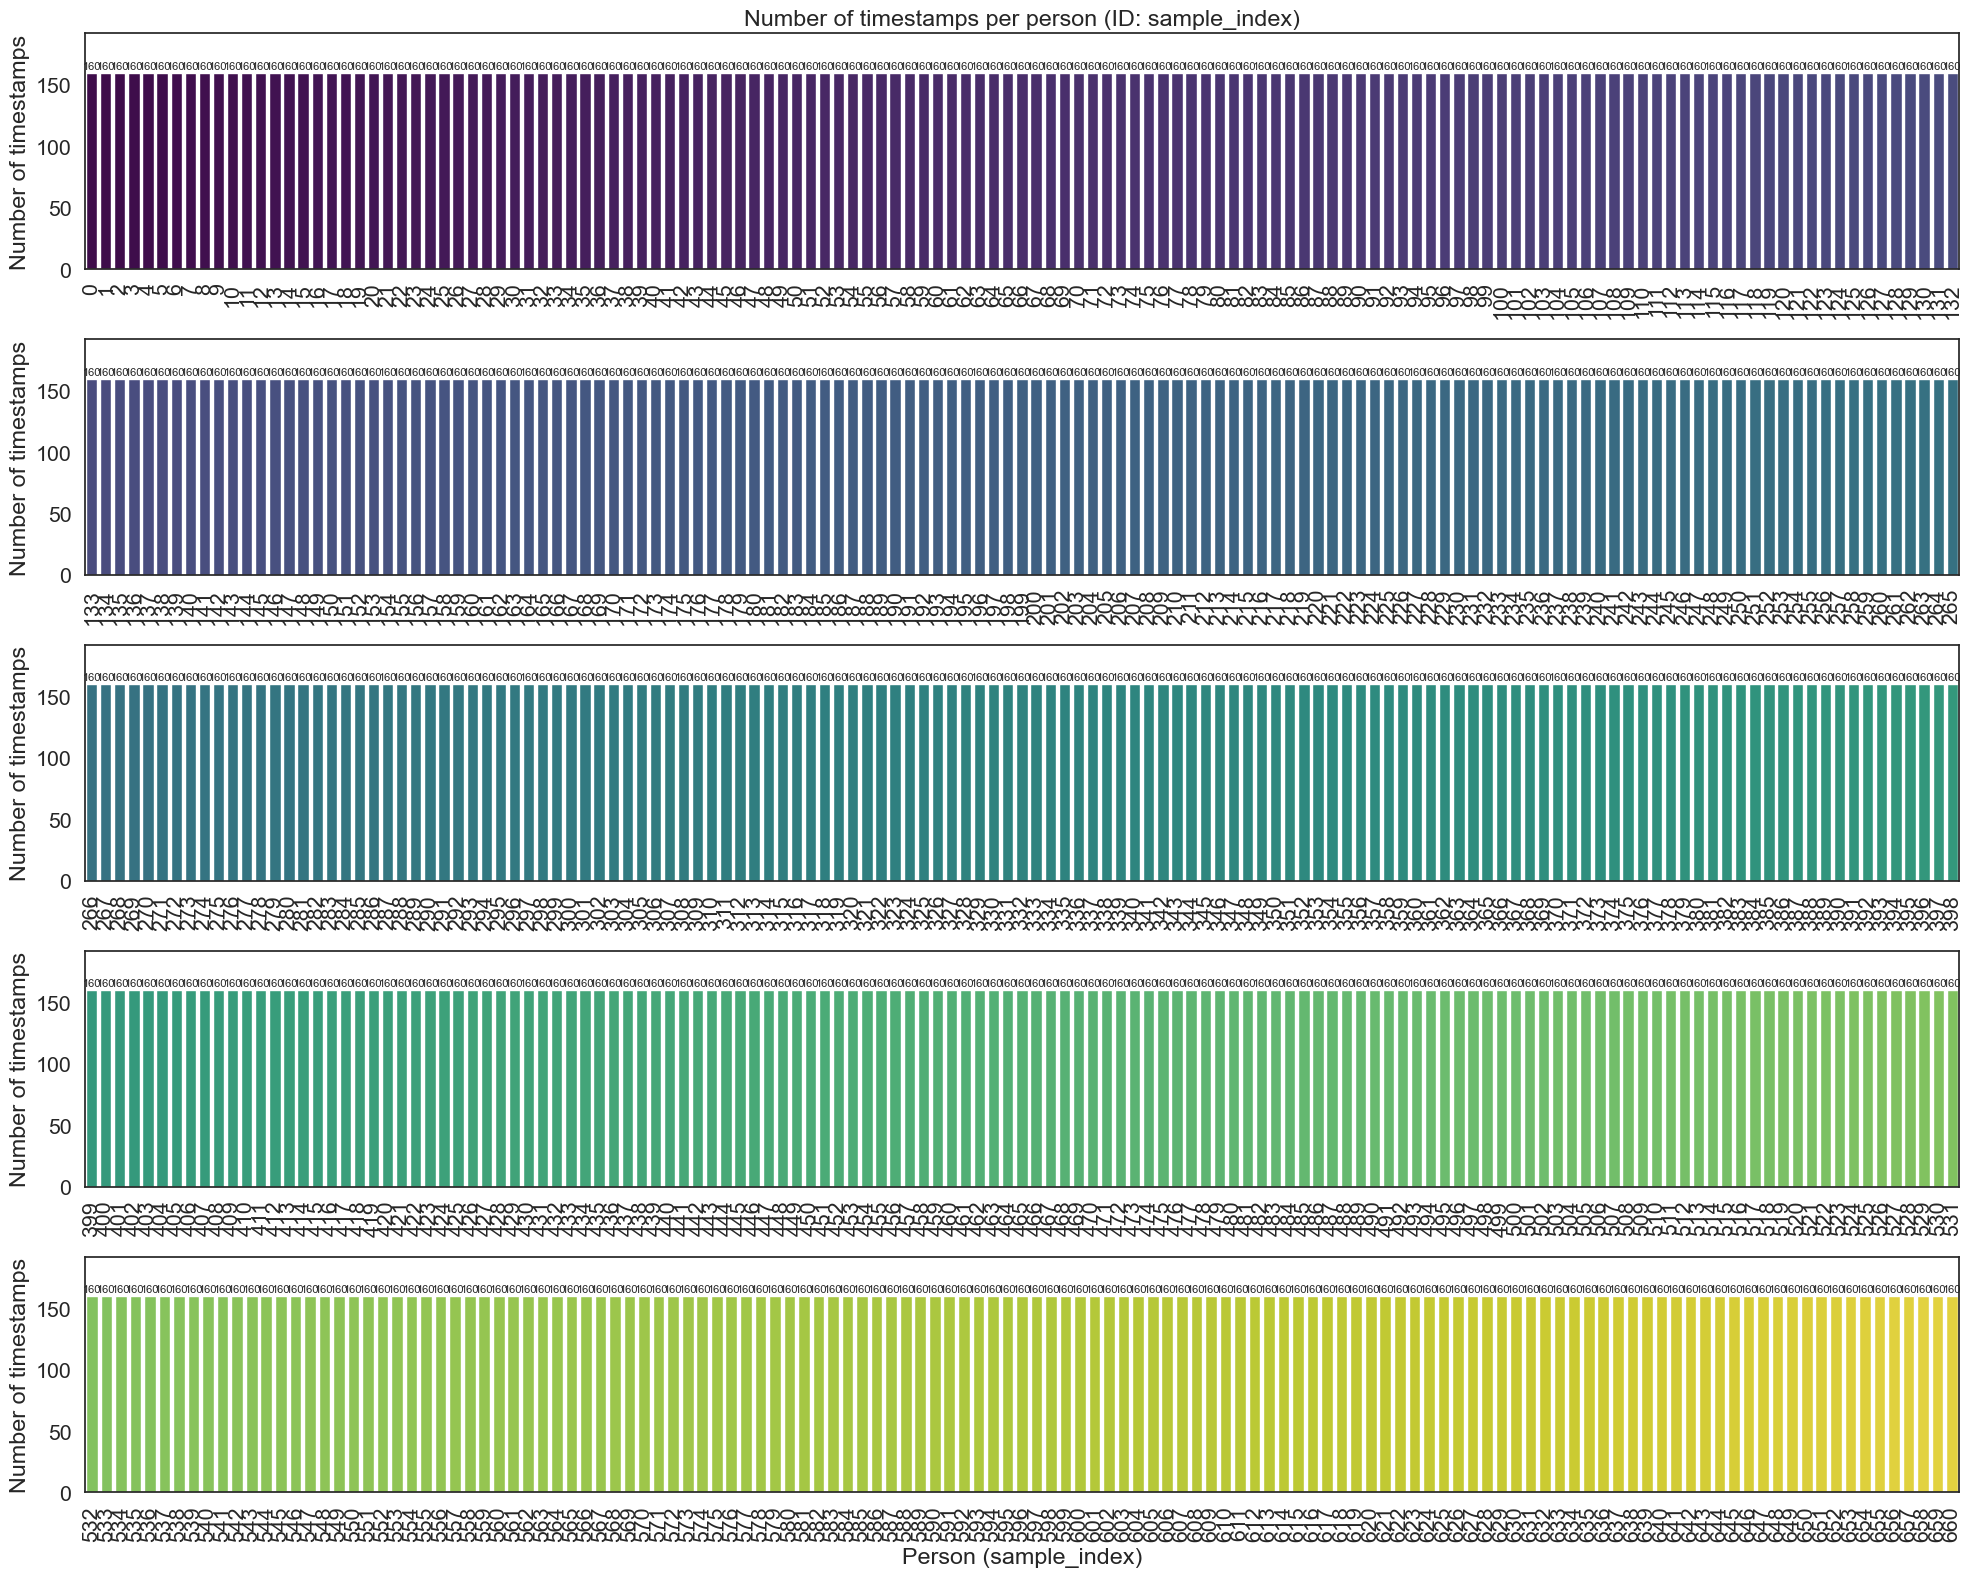

In [19]:
# Count of timestamps per person (identified by sample_index)
counts = (
    train_df.groupby('sample_index')
    .size()
    .rename('n_timestamps')
    .sort_index()
)

import math

n_people = len(counts)
n_rows = 5
chunk_size = max(1, math.ceil(n_people / n_rows))

colors = plt.cm.viridis(np.linspace(0, 1, n_people))

# Figure size: width based on the maximum block size, height for 4 rows
fig_width = max(17.0, chunk_size * 0.15)
fig_height = 16  # 4 rows
fig, axes = plt.subplots(n_rows, 1, figsize=(fig_width, fig_height), sharey=True)

# Ensure an array of axes
axes = np.atleast_1d(axes)

y_max = counts.values.max() if n_people > 0 else 0

for i in range(n_rows):
    ax = axes[i]
    start = i * chunk_size
    end = min(start + chunk_size, n_people)

    if start >= end:
        ax.axis('off')
        continue

    idx = counts.index[start:end]
    vals = counts.values[start:end]
    pal = colors[start:end]

    sns.barplot(x=list(range(len(idx))), y=vals, palette=pal, ax=ax)

    # Tick labels with the original sample_index
    ax.set_xticks(range(len(idx)))
    ax.set_xticklabels(idx)

    # Labels above the bars
    for j, v in enumerate(vals):
        ax.text(j, v + (y_max * 0.01 if y_max > 0 else 0.01), f"{int(v)}", ha="center", va="bottom", fontsize=8)

    ax.set_ylabel("Number of timestamps")
    if len(vals) > 30:
        ax.tick_params(axis='x', rotation=90)

    ax.set_ylim(0, (y_max * 1.20) if y_max > 0 else 1)

axes[0].set_title("Number of timestamps per person (ID: sample_index)")
axes[-1].set_xlabel("Person (sample_index)")

plt.tight_layout(rect=(0, 0, 1, 1))
# plt.savefig('timestamps_per_person.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Inspect sensor data for a specific person
def inspect_sensor_data(s_i, df):
    # Filter the DataFrame for the specified person (sample_index)
    data = df[df['sample_index'] == s_i][['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']]

    # Plot the sensor data for each axis
    axis = data.plot(subplots=True, figsize=(18, 4), title="Sample Index: " + str(s_i))

    # Adjust legend position for each subplot
    for ax in axis:
        ax.legend(loc='lower right')

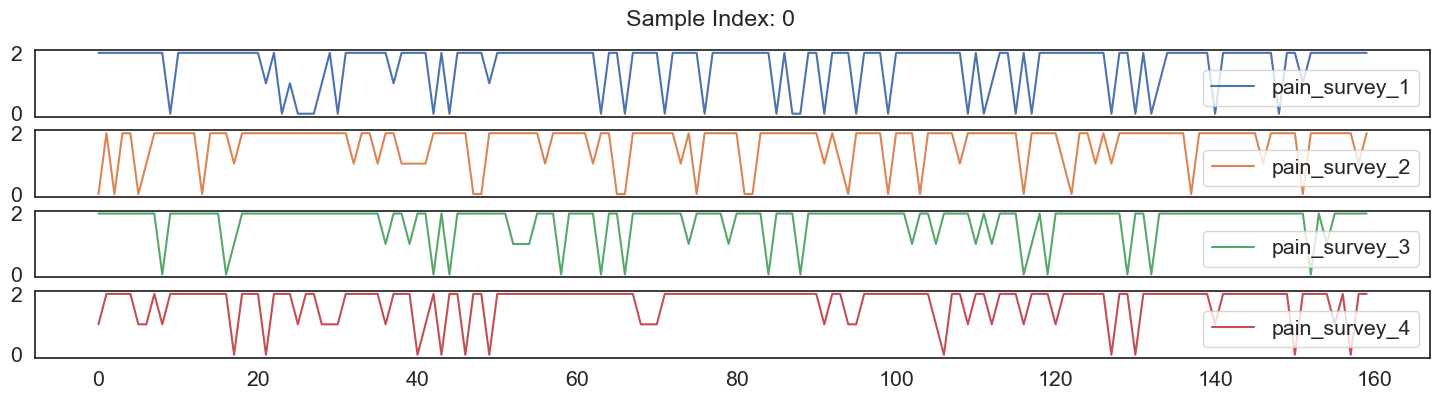

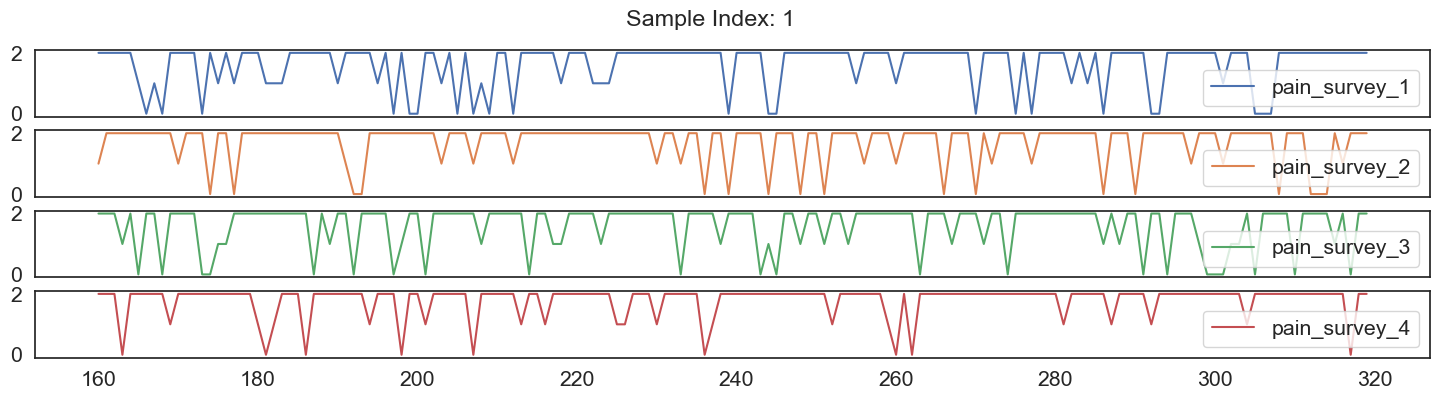

In [21]:
for sample_index in train_df['sample_index'].unique()[:2]:
    inspect_sensor_data(sample_index, train_df)

In [22]:
# Now it is time to analyze and visualize joint_00 to joint_30 data
joint_columns = [f'joint_{i:02d}' for i in range(31)]


def plot_joint_distributions(df, joint_cols, n_cols=4, figsize_per_plot=(4, 3)):
    n = len(joint_cols)
    n_rows = (n + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows),
                             constrained_layout=True)
    axes = axes.flatten()

    for ax, col in zip(axes, joint_cols):
        sns.histplot(
            df[col].dropna(),
            bins=30,
            kde=True,
            color='skyblue',
            ax=ax
        )
        ax.set_title(f"Distribution of {col.title()}", fontsize=11)
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=9)
        ax.set_ylabel("Frequency", fontsize=9)
        ax.grid(axis='y', alpha=0.25, linestyle='--', linewidth=0.7)

    for ax in axes[n:]:
        ax.axis('off')

    plt.show()
    plt.close(fig)

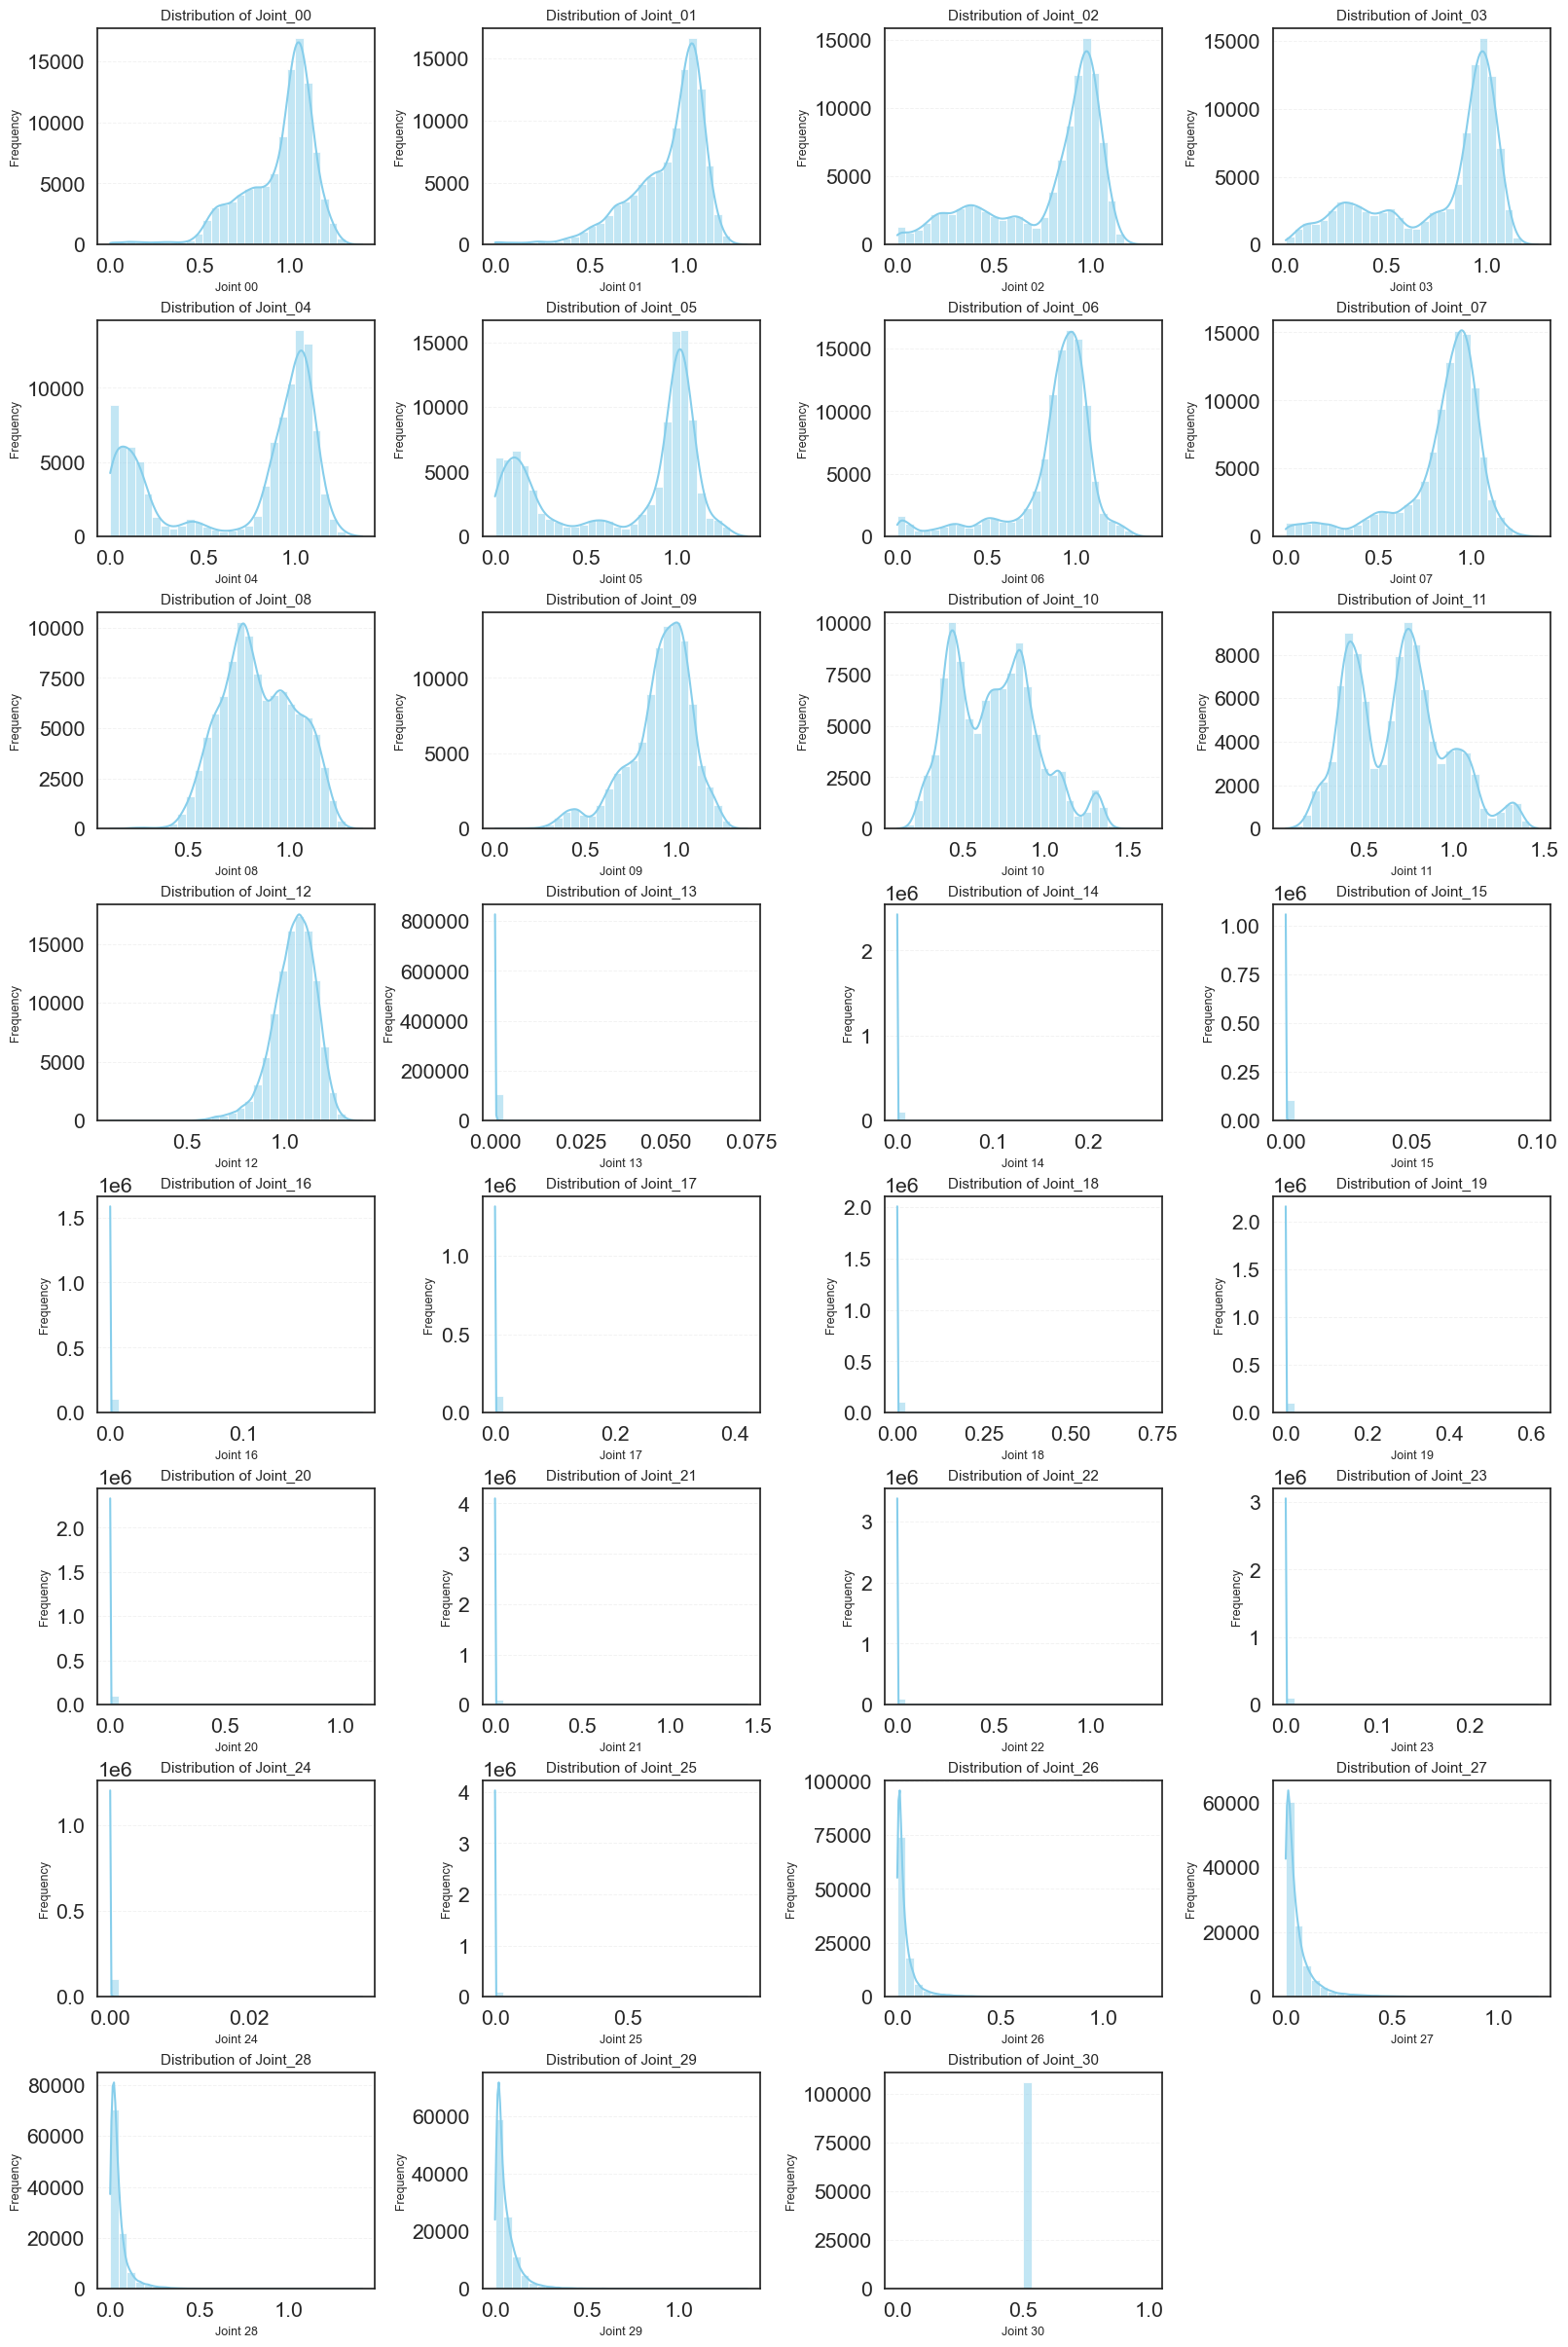

In [23]:
plot_joint_distributions(train_df, joint_columns)

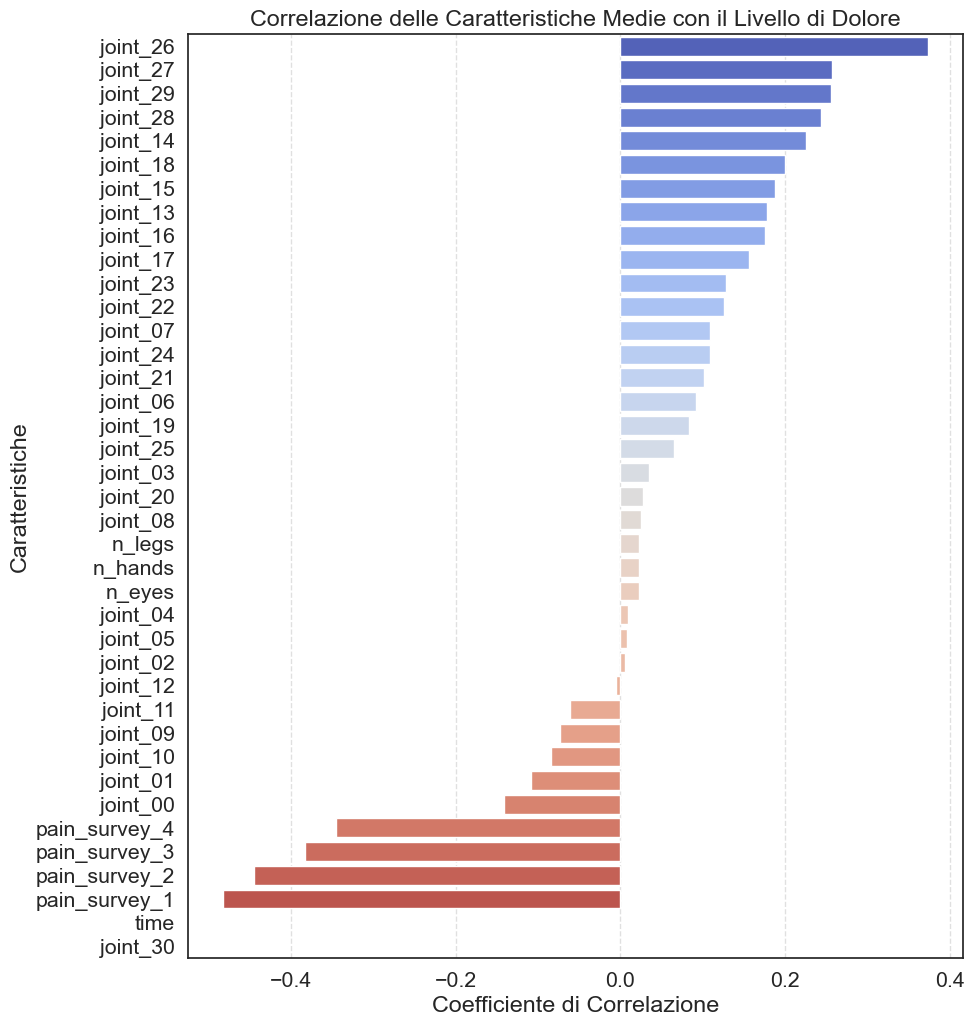

In [24]:
# Correlazione tra caratteristiche medie e livello di dolore
# Proposta da Gemini

train_full_df = pd.merge(train_df, labels_df, on='sample_index')

# Prepara i dati per la correlazione
# Crea una copia per evitare di modificare il dataframe originale
corr_df = train_full_df.copy()

# Calcola la media delle caratteristiche per ogni persona
person_avg_df = corr_df.groupby('sample_index').mean()

# Calcola la matrice di correlazione
correlation_matrix = person_avg_df.corr()

# Seleziona solo la correlazione con l'etichetta del dolore e ordinala
pain_correlation = correlation_matrix['label'].drop('label').sort_values(ascending=False)

# Visualizza la correlazione con il dolore
plt.figure(figsize=(10, 12))
sns.barplot(x=pain_correlation.values, y=pain_correlation.index, palette='coolwarm')
plt.title('Correlazione delle Caratteristiche Medie con il Livello di Dolore')
plt.xlabel('Coefficiente di Correlazione')
plt.ylabel('Caratteristiche')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [25]:
# Fatto da Gemini

def plot_feature_distribution_by_pain_level(full_df, features_to_plot):
    n_features = len(features_to_plot)

    # Crea i subplot
    fig, axes = plt.subplots(n_features, 1, figsize=(12, n_features * 4))
    fig.suptitle('Distribuzione delle Caratteristiche per Livello di Dolore', fontsize=16)

    for i, feature in enumerate(features_to_plot):
        sns.boxplot(
            x='label',
            y=feature,
            data=full_df,
            order=[0, 1, 2],
            ax=axes[i]
        )
        axes[i].set_title(f'Distribuzione di {feature}')
        axes[i].set_xlabel('Livello di Dolore')
        axes[i].set_ylabel('Valore')

    plt.tight_layout(rect=(0, 0, 1, 0.97))
    plt.show()


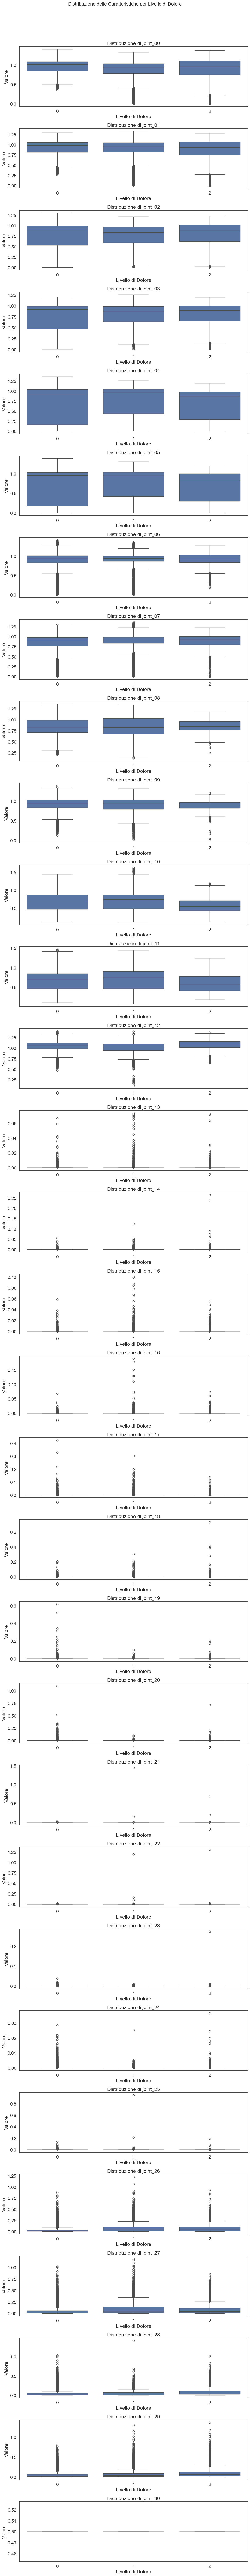

In [26]:
plot_feature_distribution_by_pain_level(train_full_df, joint_columns)

In [27]:
# Fatto da Gemini

def analyze_features_over_time_grid(features, df, n_cols=4, figsize_per_plot=(5.5, 2.8)):
    import math

    n = len(features)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows),
        sharex=True
    )
    axes = axes.flatten()

    # Precalcolo delle medie per ogni livello di dolore su tutte le feature
    pain_cfg = [
        (0, 'tab:green'),
        (1, 'tab:orange'),
        (2, 'tab:red'),
    ]
    means_by_pain = {}
    for pain_level, color in pain_cfg:
        mean_df = df[df['label'] == pain_level].groupby('time')[features].mean()
        means_by_pain[pain_level] = (mean_df, color)

    # Disegno per-feature
    for ax, feat in zip(axes, features):
        for pain_level, (mean_df, color) in means_by_pain.items():
            if feat in mean_df.columns:
                ax.plot(mean_df.index, mean_df[feat].values, label=pain_level, color=color, linewidth=1.2)
        ax.set_title(feat.replace('_', ' ').title(), fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

    # Celle in eccesso
    for ax in axes[n:]:
        ax.axis('off')

    # Legenda condivisa
    handles = [plt.Line2D([0], [0], color=color, lw=2) for _, color in pain_cfg]
    labels = [lvl for lvl, _ in pain_cfg]
    fig.legend(handles, labels, loc='upper right', frameon=False)

    fig.suptitle('Andamento temporale medio per livello di dolore', y=0.995)
    fig.supxlabel('Tempo')
    fig.supylabel('Valore medio')

    plt.tight_layout(rect=(0, 0, 0.9, 0.96))
    plt.show()
    plt.close(fig)


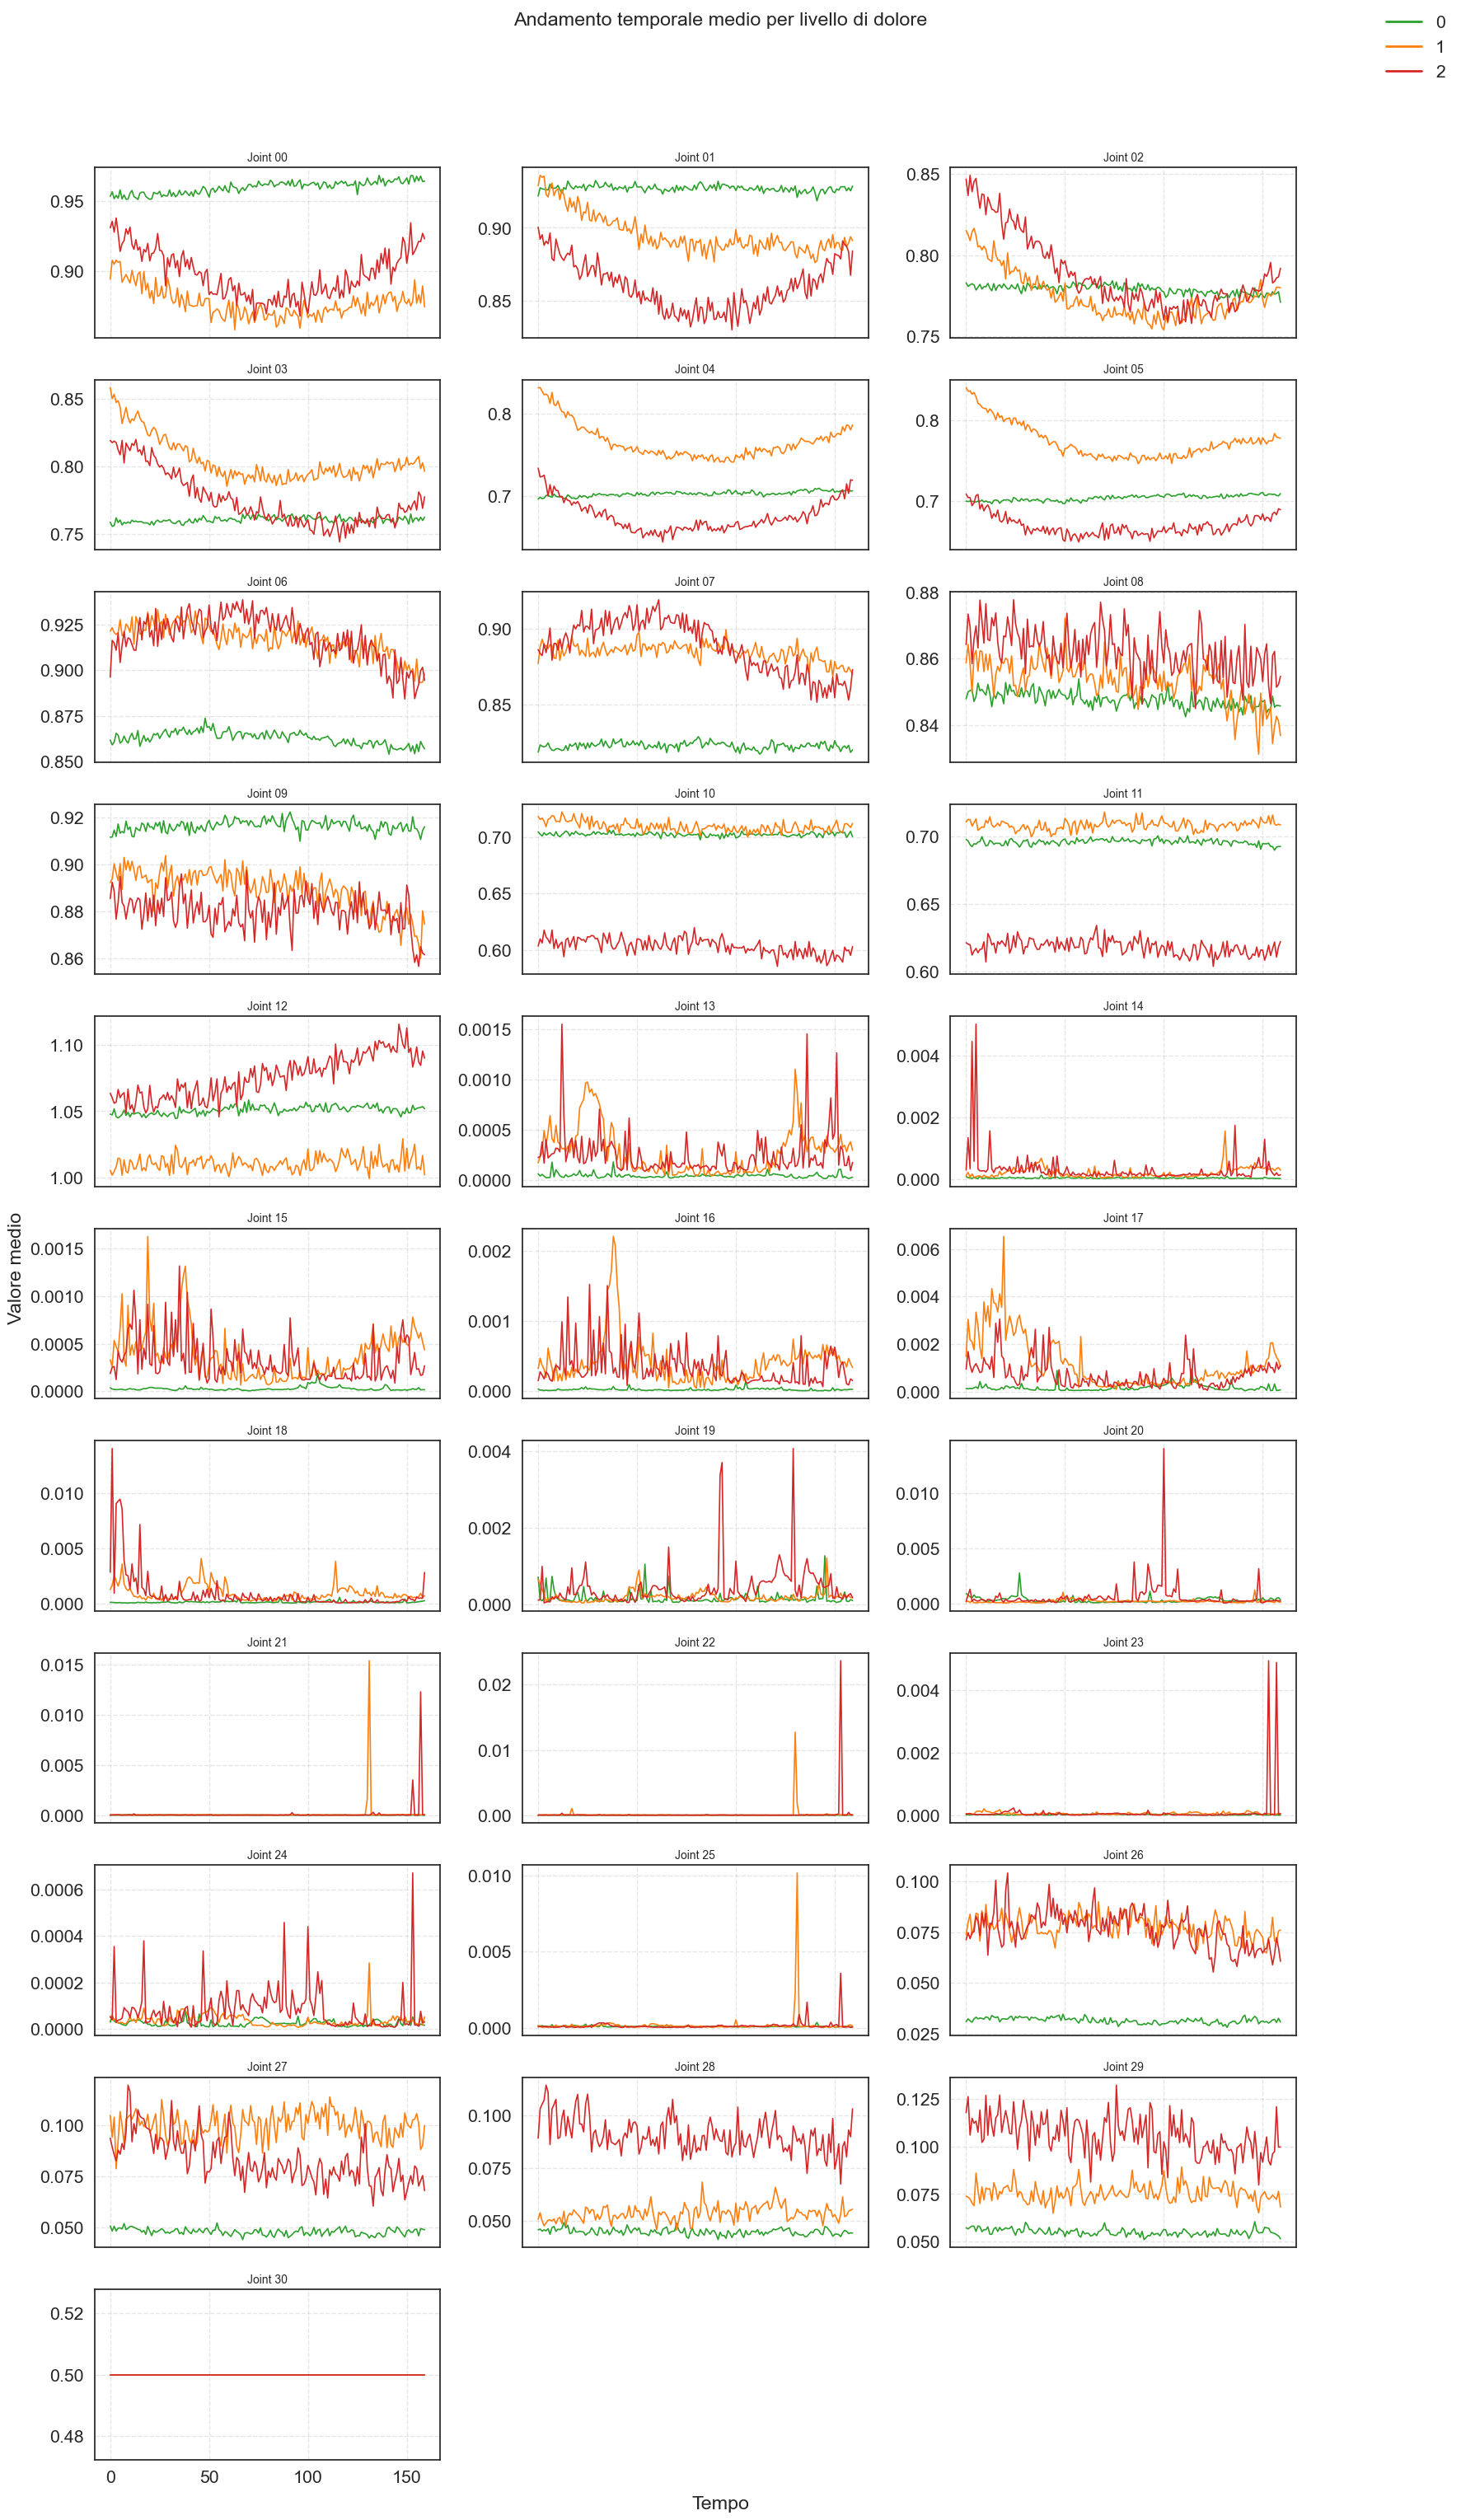

In [28]:
analyze_features_over_time_grid(joint_columns, train_full_df, n_cols=3, figsize_per_plot=(6, 2.8))

<Figure size 2500x800 with 0 Axes>

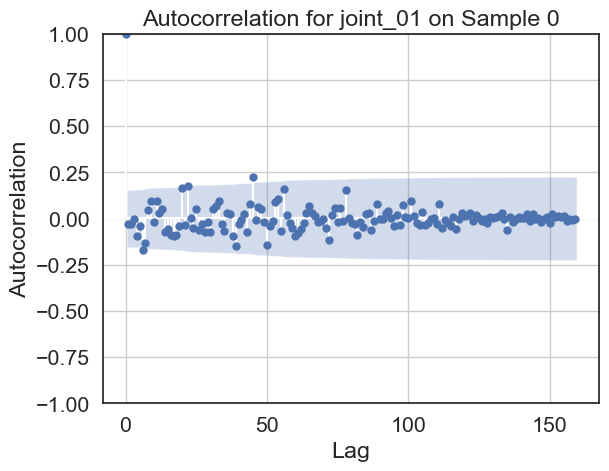

In [29]:

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Seleziona una feature rappresentativa e un singolo campione per l'analisi
sample_id_to_analyze = train_df['sample_index'].unique()[0]
feature_to_analyze = 'joint_01'

# Estrai la serie temporale per quel campione e quella feature
time_series = train_df[train_df['sample_index'] == sample_id_to_analyze][feature_to_analyze]

# Imposta il numero massimo di lag da visualizzare

n_lags = 159

# Crea il grafico dell'autocorrelazione
plt.figure(figsize=(25, 8))
plot_acf(time_series, lags=n_lags, title=f'Autocorrelation for {feature_to_analyze} on Sample {sample_id_to_analyze}')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Generating Autocorrelation plots for sample_index: 5


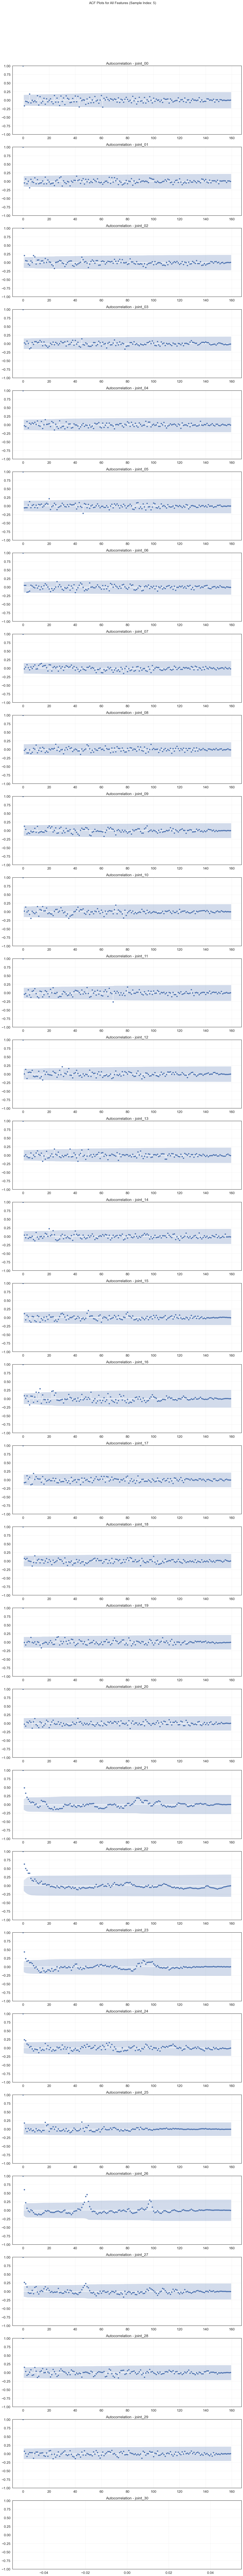

In [30]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Seleziona un 'sample_index' rappresentativo per l'analisi
# Puoi cambiare l'indice [0] per analizzare campioni diversi
sample_id_to_analyze = train_df['sample_index'].unique()[5]
sample_df = train_df[train_df['sample_index'] == sample_id_to_analyze]

# Combina le colonne continue e categoriche per l'analisi
JOINT_COLUMNS = [f'joint_{i:02d}' for i in range(31)]

CONTINUOUS_COLS = JOINT_COLUMNS
CATEGORICAL_COLS = ['n_legs', 'n_hands', 'n_eyes', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']

all_features = JOINT_COLUMNS  #+ CATEGORICAL_COLS

# Calcola il numero di righe e colonne per il subplot
n_features = len(all_features)
n_cols = 1  # Numero di colonne per il layout
n_rows = int(np.ceil(n_features / n_cols))

# Crea la figura e gli assi per i subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Appiattisce l'array di assi per un'iterazione più semplice

print(f"Generating Autocorrelation plots for sample_index: {sample_id_to_analyze}")

# Itera su ogni feature e genera il grafico di autocorrelazione
for i, col in enumerate(all_features):
    ax = axes[i]
    plot_acf(sample_df[col], ax=ax, lags=159, title=f'Autocorrelation - {col}')
    ax.grid(True, alpha=0.3)

# Nasconde gli assi vuoti se il numero di feature non riempie la griglia
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.suptitle(f'ACF Plots for All Features (Sample Index: {sample_id_to_analyze})', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

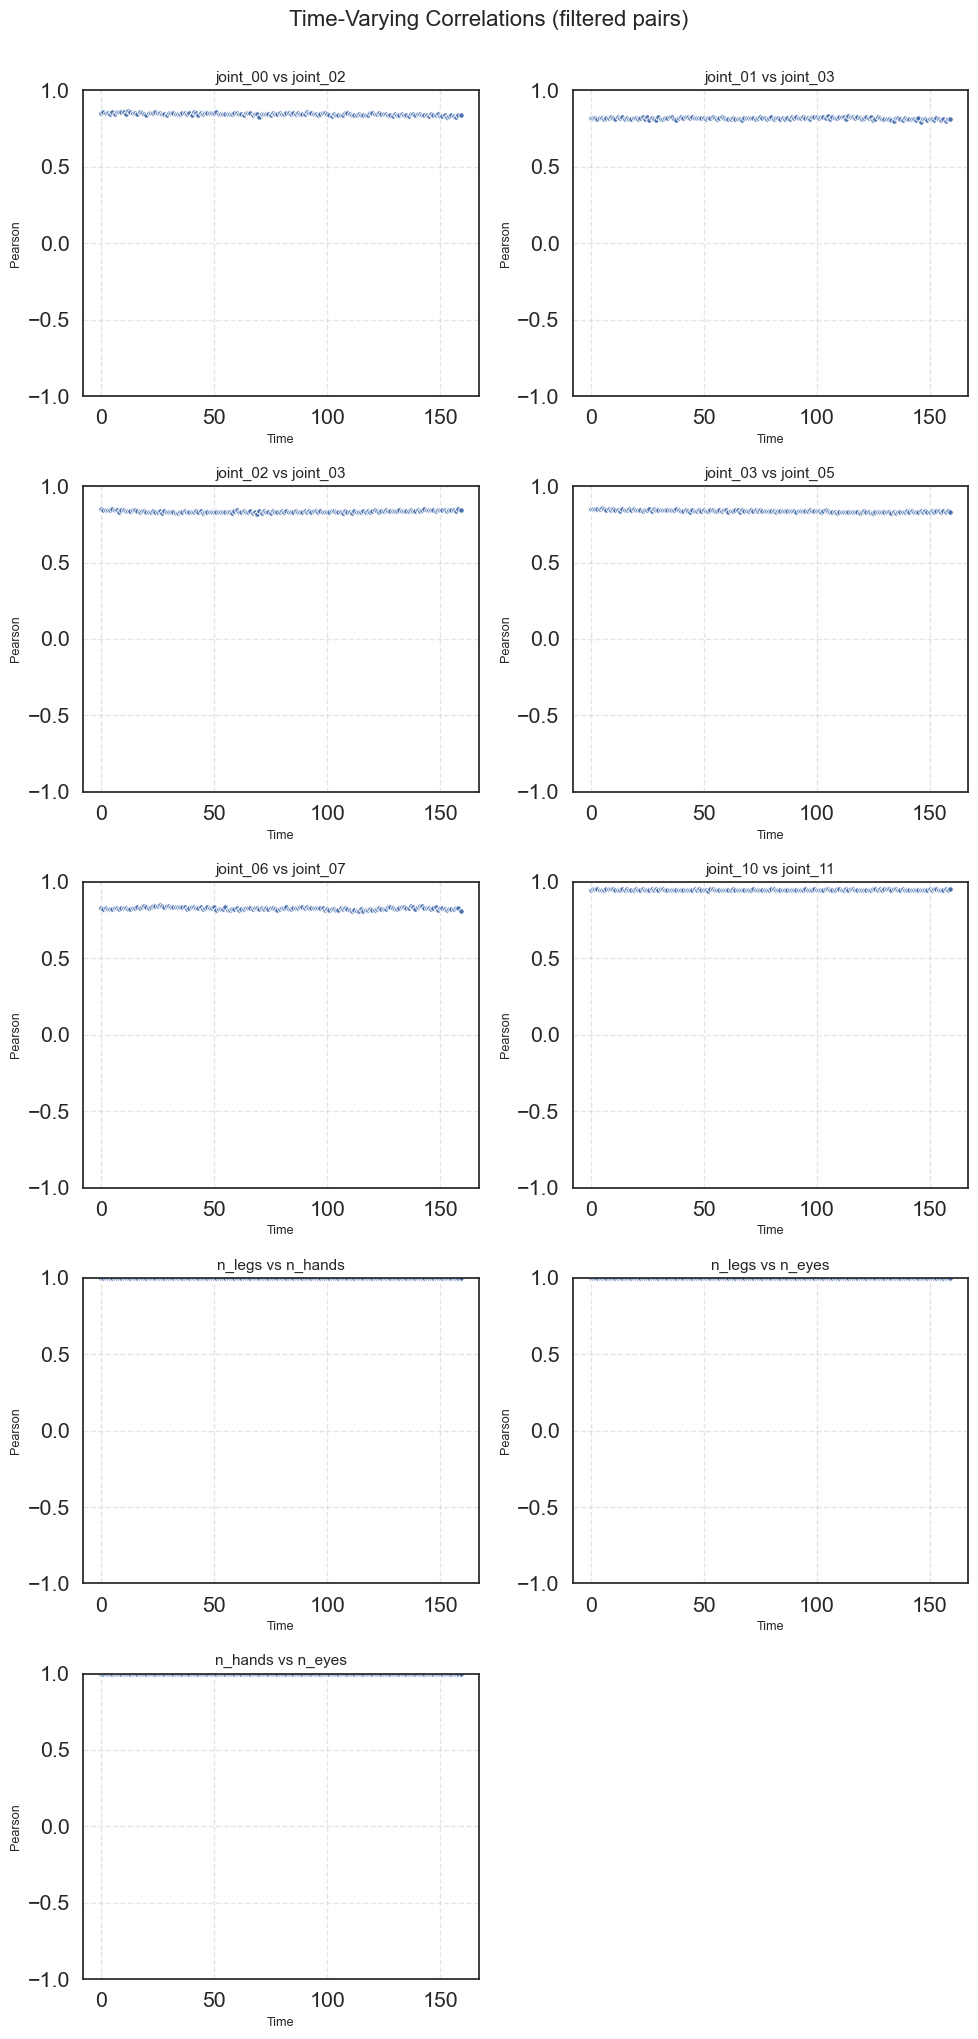

In [31]:

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parametri
showAllPlots = False
correlation_threshold = 0.8
min_time_points_ratio = 1.0  # frazione minima di time step con valore valido per considerare la coppia

# Elenco colonne (assumendo siano tutte numeriche già)
joint_cols = [f'joint_{i:02d}' for i in range(31)]
extra_cols = ['n_legs', 'n_hands', 'n_eyes',
              'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4', 'time']
all_features = joint_cols + extra_cols

# Filtra solo colonne presenti e numeriche
numeric_features = [c for c in all_features
                    if c in train_df.columns and pd.api.types.is_numeric_dtype(train_df[c])]
if not numeric_features:
    raise ValueError("Nessuna feature numerica disponibile.")

# Time steps unici
unique_times = np.sort(train_df['time'].unique())

# Prepara struttura per raccogliere serie di correlazioni
pair_list = list(itertools.combinations(numeric_features, 2))
corr_series = {pair: [] for pair in pair_list}

# Loop sui time step calcolando una sola volta la matrice di correlazione
for t in unique_times:
    df_t = train_df[train_df['time'] == t]

    # Rimuove colonne con valore costante (corr non definita)
    usable_cols = [c for c in numeric_features if df_t[c].nunique() > 1]
    if len(usable_cols) < 2:
        # Tutte le coppie ricevono NaN
        for pair in pair_list:
            corr_series[pair].append({'time': t, 'correlation': np.nan})
        continue

    corr_matrix = df_t[usable_cols].corr(method='pearson')

    # Riempie i valori per ciascuna coppia
    for f1, f2 in pair_list:
        if f1 in corr_matrix.index and f2 in corr_matrix.columns:
            val = corr_matrix.at[f1, f2]
        else:
            val = np.nan
        corr_series[(f1, f2)].append({'time': t, 'correlation': val})

# Costruzione DataFrame per ciascuna coppia + filtro
plots_to_generate = []
for (f1, f2), records in corr_series.items():
    df_corr_pair = pd.DataFrame(records)
    valid = df_corr_pair['correlation'].dropna()
    if showAllPlots:
        plots_to_generate.append((f1, f2, df_corr_pair))
    else:
        if len(valid) == 0:
            continue
        avg_abs = valid.abs().mean()
        coverage_ratio = len(valid) / len(df_corr_pair)
        if (avg_abs >= correlation_threshold) and (coverage_ratio >= min_time_points_ratio):
            plots_to_generate.append((f1, f2, df_corr_pair))

n_pairs_to_plot = len(plots_to_generate)

if n_pairs_to_plot == 0:
    print(f"Nessun grafico da mostrare (threshold={correlation_threshold}, showAllPlots={showAllPlots}).")
else:
    n_cols_plot = 2
    n_rows_plot = (n_pairs_to_plot + n_cols_plot - 1) // n_cols_plot
    plt.figure(figsize=(n_cols_plot * 5, n_rows_plot * 4))

    for idx, (f1, f2, df_corr_pair) in enumerate(plots_to_generate):
        plt.subplot(n_rows_plot, n_cols_plot, idx + 1)
        sns.lineplot(data=df_corr_pair, x='time', y='correlation', marker='o', linewidth=1, markersize=4)
        plt.title(f'{f1} vs {f2}', fontsize=11)
        plt.xlabel('Time', fontsize=9)
        plt.ylabel('Pearson', fontsize=9)
        plt.ylim(-1, 1)
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.suptitle('Time-Varying Correlations (filtered pairs)', y=1.02, fontsize=16)
    plt.show()

In [39]:
# Seleziono solo colonne numeriche (per varianza, correlazioni, ecc.)
numeric_df = train_df.select_dtypes(include=["number"])
numeric_df.head(5)

sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              0              2   
1             0     1              2              2              2   
2             0     2              2              0              2   
3             0     3              2              2              2   
4             0     4              2              2              2   

   pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...      joint_21  \
0              1       2        2       2  1.094705  ...  3.499558e-06   
1              2       2        2       2  1.135183  ...  3.976952e-07   
2              2       2        2       2  1.080745  ...  1.533820e-07   
3              2       2        2       2  0.938017  ...  1.006865e-05   
4              2       2        2       2  1.090185  ...  4.437265e-06   

       joint_22  joint_23      joint_24  joint_25  joint_26  joint_27  \
0  1.945042e-06  0.000004  1.153299e-05  0.000004  0.017592  0.013508   
1  6.765108e-07  0.000006  4.643774e-08  0.000000  0.013352  0.000000   
2  1.698525e-07  0.000001  2.424536e-06  0.000003  0.016225  0.008110   
3  5.511079e-07  0.000002  5.432416e-08  0.000000  0.011832  0.007450   
4  1.735459e-07  0.000002  5.825366e-08  0.000007  0.005360  0.002532   

   joint_28  joint_29  joint_30  
0  0.026798  0.027815       0.5  
1  0.013377  0.013716       0.5  
2  0.024097  0.023105       0.5  
3  0.028613  0.024648       0.5  
4  0.033026  0.025328       0.5  

[5 rows x 40 columns]

In [46]:

# Calcolo la varianza di ogni colonna numerica
variances = numeric_df.var()

# Ordino dalla varianza più bassa alla più alta
variances_sorted = variances.sort_values()
print("Varianza delle colonne numeriche (ordinate):")
display(variances_sorted)

# Soglia per considerare una colonna "quasi costante"
threshold = 1e-6
zero_var_cols = variances_sorted[variances_sorted <= threshold].index.tolist()

print("\nColonne con varianza (quasi) zero:")
print(zero_var_cols)

Varianza delle colonne numeriche (ordinate):


joint_30         0.000000e+00
joint_24         1.650727e-07
joint_13         1.445790e-06
joint_23         1.526335e-06
joint_15         1.658092e-06
joint_14         2.195316e-06
joint_16         2.653107e-06
joint_25         1.027925e-05
joint_19         1.515143e-05
joint_17         1.921160e-05
joint_21         2.474561e-05
joint_18         2.486834e-05
joint_22         2.994546e-05
joint_20         4.174296e-05
joint_26         3.635220e-03
joint_28         3.693392e-03
joint_29         5.270355e-03
joint_27         6.371117e-03
n_legs           8.994846e-03
n_hands          8.994846e-03
n_eyes           8.994846e-03
joint_12         1.228427e-02
joint_09         3.251544e-02
joint_08         3.257645e-02
joint_01         3.904877e-02
joint_00         4.082465e-02
joint_07         5.659822e-02
joint_06         5.803273e-02
joint_10         6.634347e-02
joint_11         6.898244e-02
joint_02         8.738209e-02
joint_03         9.047312e-02
joint_05         1.695654e-01
joint_04  


Colonne con varianza (quasi) zero:
['joint_30', 'joint_24']


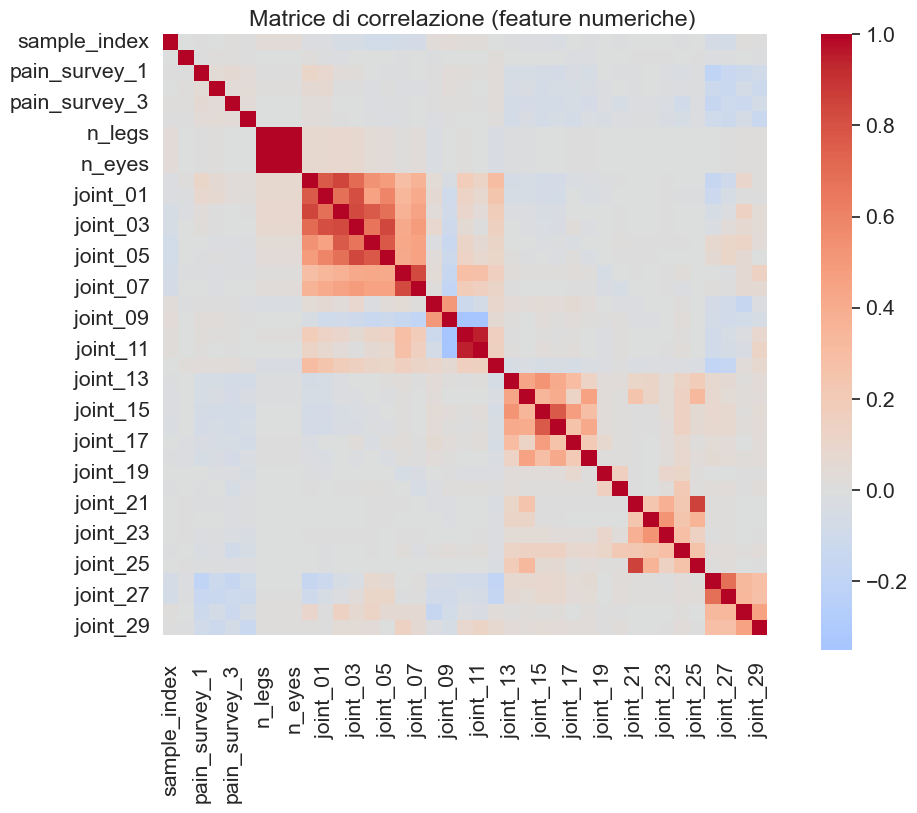

Coppie di feature con correlazione |r| >= 0.85:
n_legs - n_hands: r = 1.000
n_legs - n_eyes: r = 1.000
n_hands - n_eyes: r = 1.000
joint_10 - joint_11: r = 0.949
joint_21 - joint_25: r = 0.854


In [47]:

# Matrice di correlazione tra variabili numeriche
corr_matrix = numeric_df.corr()

# Visualizzazione rapida della matrice (se avete già importato seaborn/matplotlib, meglio ancora)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matrice di correlazione (feature numeriche)")
plt.show()

# Trovo coppie di colonne con correlazione assoluta molto alta
corr_threshold = 0.85  # puoi giocare con questo valore (0.8, 0.85, 0.95, ...)

high_corr_pairs = []

cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= corr_threshold:
            high_corr_pairs.append((cols[i], cols[j], corr_value))

print(f"Coppie di feature con correlazione |r| >= {corr_threshold}:")
for a, b, r in high_corr_pairs:
    print(f"{a} - {b}: r = {r:.3f}")

In [34]:
from scipy.stats import zscore

# Calcolo lo z-score per le colonne numeriche
z_scores = numeric_df.apply(zscore)

# Soglia tipica: valori oltre 7 deviazioni standard dalla media
z_threshold = 7.0

# Creo una maschera booleana: True se almeno una feature è oltre la soglia
outlier_mask = (z_scores.abs() > z_threshold).any(axis=1)

outliers = train_df[outlier_mask]

print(f"Numero di righe identificate come potenziali outlier: {outlier_mask.sum()}")
print("Prime 5 righe outlier:")
display(outliers.head())

# Se vuoi vedere gli indici delle righe outlier:
print("\nIndici delle righe outlier:")
print(outliers.index.tolist())

Numero di righe identificate come potenziali outlier: 2712
Prime 5 righe outlier:


sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
305             1   145              0              2              0   
395             2    75              1              1              1   
399             2    79              2              1              1   
400             2    80              1              2              1   
412             2    92              1              0              1   

     pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...      joint_21  \
305              2       2        2       2  1.287703  ...  0.000000e+00   
395              1       2        2       2  0.136031  ...  3.038101e-08   
399              0       2        2       2  0.204594  ...  1.922742e-06   
400              0       2        2       2  0.210080  ...  1.605773e-06   
412              0       2        2       2  0.199452  ...  4.213515e-06   

         joint_22      joint_23      joint_24      joint_25  joint_26  \
305  2.791157e-06  2.716566e-06  2.570752e-07  3.519931e-06  0.146043   
395  3.028120e-07  3.096173e-07  2.940711e-07  5.302623e-06  0.504056   
399  1.703124e-06  5.978962e-07  7.840680e-07  4.143112e-07  0.522695   
400  3.083736e-07  2.637359e-06  9.360671e-07  4.278070e-07  0.486871   
412  2.173232e-06  2.650172e-07  3.042305e-07  3.998800e-06  0.498587   

     joint_27  joint_28  joint_29  joint_30  
305  0.136554  0.502154  0.299454       0.5  
395  0.699240  0.044597  0.054617       0.5  
399  0.351792  0.062052  0.053553       0.5  
400  0.247500  0.078585  0.059791       0.5  
412  0.302626  0.052513  0.036484       0.5  

[5 rows x 40 columns]


Indici delle righe outlier:
[305, 395, 399, 400, 412, 416, 417, 418, 423, 467, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 14